## Adaboost

In [1]:
#IMPORT DATA
import pandas as pd
import numpy as np
data_train = pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')


In [2]:
#Separate X and y (explanatory variables and target variable in train set)
X_train = data_train.iloc[:,2:]
column_names = list(X_train) 
Y_train = data_train.iloc[:,0] 
del X_train['Retained_class']
X_train.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,...,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,9,...,0.570244,0.119431,2708.000000,0.888166,0.000000,0.000000,31.333333,3,2,190.000000
1,other,air,East Coast,K,Middle,K->Middle,C,other,other,other,...,0.510360,0.190362,1250.605592,1.000000,0.000000,0.000000,0.000000,0,1,199.424613
2,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,5,...,0.623850,0.274595,2518.000000,0.929941,0.966667,0.400000,34.333333,3,-13,164.000000
3,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,5,...,0.592224,0.262095,2505.000000,0.894531,0.933333,0.733333,57.666667,3,-1,162.000000
4,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,9,...,0.571137,0.088141,2569.000000,0.850497,0.000000,0.200000,54.333333,3,-4,195.000000


In [4]:
#Separate X and y (explanatory variables and target variable in test set)
X_test = data_test.iloc[:,2:]
column_names = list(X_test) 
Y_test = data_test.iloc[:,0] 
del X_test['Retained_class']
X_test.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,...,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,other,air,East Coast,K,High,K->High,C,other,Southern California,10,...,0.345746,0.103222,2167.0,0.991415,0.766667,0.829167,62.000000,3,-2,320.0
1,other,air,East Coast,PK,Middle,PK->Middle,C,other,Southern California,11,...,0.404058,0.104028,2148.0,0.915161,1.000000,0.533333,44.666667,3,4,213.0
2,other,air,East Coast,K,Middle,K->Middle,C,other,Pacific Northwest,1,...,0.517738,0.000000,1989.0,0.866585,1.000000,1.000000,23.000000,3,1,139.0
3,other,air,East Coast,Middle,Middle,Middle->Middle,C,other,Southern California,5,...,0.721320,0.381479,2388.0,0.887128,0.000000,0.000000,50.000000,3,-12,399.0
4,other,air,East Coast,K,Middle,K->Middle,C,other,Southern California,5,...,0.492463,0.168508,2360.0,0.957977,0.700000,0.800000,23.000000,4,-4,207.0


In [5]:
#CREATE DUMMIES VARIABLES
X_test=pd.get_dummies(X_test,columns=X_test.columns[:31])

In [6]:
X_train=pd.get_dummies(X_train,columns=X_train.columns[:31])

In [7]:
missing_cols = set( X_train.columns ) - set( X_test.columns )
#Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=10))
adaboost.fit(X_train, Y_train)

y_pred = adaboost.predict(X_test)

y_pred_train = adaboost.predict(X_test)
print("f1_score: ", metrics.f1_score(Y_test, y_pred))

f1_score:  0.9226277372262773


In [12]:
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [100, 500, 1000, 2000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed: 17.1min remaining:   44.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 17.6min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1.0],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='f1', verbose=10)

In [13]:
#summarize the results of the GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.642979 using {'learning_rate': 1.0, 'n_estimators': 2000}
0.599285 (0.281106) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.599285 (0.281106) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.599285 (0.281106) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.599285 (0.281106) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.597258 (0.279494) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.597385 (0.294635) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.612940 (0.272984) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.622577 (0.257789) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.613214 (0.271515) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.604313 (0.234665) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.622433 (0.209391) with: {'learning_rate': 0.1, 'n_estimators': 1000}
0.641138 (0.188564) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.634193 (0.201754) with: {'learning_rate

In [14]:
#TEST ON THE TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

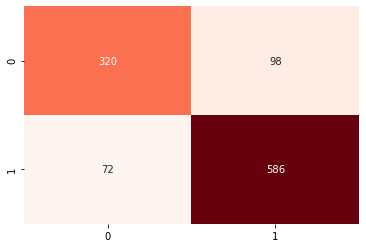

In [16]:
# Plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       418
           1       0.86      0.89      0.87       658

    accuracy                           0.84      1076
   macro avg       0.84      0.83      0.83      1076
weighted avg       0.84      0.84      0.84      1076



In [18]:
y_pred_train = adaboost.predict(X_train)
print("f1_score: ", metrics.f1_score(Y_train, y_pred_train))

f1_score:  1.0


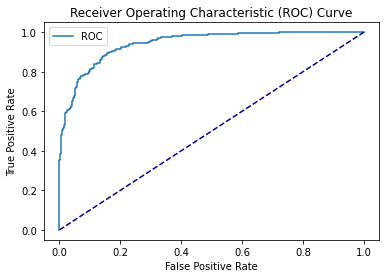

AUC: 0.94


In [19]:
adaboost = AdaBoostClassifier(n_estimators=2000, learning_rate=0.1)

adaboost.fit(X_train,Y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(Y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(Y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [26]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(Y_train, adaboost.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(Y_train, adaboost.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(Y_train, adaboost.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(Y_train, adaboost.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(Y_test, adaboost.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(Y_test, adaboost.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(Y_test, adaboost.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(Y_test, adaboost.predict(X_test))))

MAE train:  0.08237844533911427
MSE train:  0.08237844533911427
RMSE train:  0.28701645482291477
r2:  0.808204951466514
MAE test:  0.129182156133829
MSE test:  0.129182156133829
RMSE test:  0.3594191927733256
r2:  0.6754390529312272
